handling imbalanced data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [4]:
df = pd.read_csv('Training data file.csv', index_col='Customer_No')

In [5]:
col = df.columns

In [7]:
col

Index(['N_Default_L3m', 'Branch_Code', 'Max_Utilization',
       'Max_Perc_Def_Chg_Pending', 'N_Family_Member',
       'Max_Ratio_OC_Pending_POS', 'N_PosBkt_L3m', 'CoAp_Income',
       'Ever_Default_L12M', 'Perc_Paymode_Online', 'Perc_Repay_Fail',
       'Birth_Year', 'Max_DPD_L3m', 'Perc_Paymode_Cheq_Fail', 'Age',
       'Total_Field_Trails', 'Total_Resolved', 'N_Enq_L9m',
       'Max_Loan_Balance_Others', 'N_WorkEx_Yr', 'Target_Flag'],
      dtype='object')

set number of family members to positive
set max loan balance to others
years of exp to positive

In [12]:
df['Target_Flag'].nunique()

2

In [7]:
df.drop(columns=['Branch_Code','Birth_Year'], inplace= True)

In [8]:
def unique_values(column):
    return df[column].unique(), df[column].nunique()

In [9]:
df['Max_Ratio_OC_Pending_POS'].fillna(value=0, inplace=True)
df['Max_Perc_Def_Chg_Pending'].fillna(value=0, inplace=True)

In [10]:
df.drop(columns = 'CoAp_Income', inplace = True)

In [11]:
df['Perc_Paymode_Cheq_Fail'].fillna(value=0, inplace=True)

In [12]:
df['Total_Field_Trails'].fillna(value=0, inplace=True)
df['Total_Resolved'].fillna(value=0, inplace=True)
df['N_PosBkt_L3m'].fillna(value=0, inplace=True)
df['Max_DPD_L3m'].fillna(value=0, inplace=True)
df['Max_Loan_Balance_Others'].fillna(value=0, inplace=True)


In [13]:
df['Ever_Default_L12M'] = df['Ever_Default_L12M'].replace({'Yes': 1, 'No': 0})

In [14]:
df1 = df.copy()

In [15]:
y_train = df['Target_Flag']
df = df.drop('Target_Flag',axis=1)

In [16]:
scaler = MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index = df.index, columns = df.columns)

In [17]:
skf = StratifiedKFold(n_splits = 10)

results = []

for train_c, test_c in skf.split(df, y_train):
    model = LogisticRegression()
    model.fit(df.iloc[train_c,:], y_train.iloc[train_c])
    result = model.score(df.iloc[test_c, :], y_train.iloc[test_c])
    results.append(result)

In [18]:
for i, result in enumerate(results):
    print('Fold{}: {:.2f}%'.format(i+1, result*100))

Fold1: 87.94%
Fold2: 87.90%
Fold3: 87.92%
Fold4: 87.82%
Fold5: 87.89%
Fold6: 87.83%
Fold7: 87.96%
Fold8: 87.96%
Fold9: 87.98%
Fold10: 87.94%


In [19]:
y_train.value_counts()

0    71469
1     9784
Name: Target_Flag, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df, y_train, train_size=0.7, random_state=123)

In [21]:
model = LogisticRegression(
    class_weight={
        0: 1,
        1: 8
    }
)

model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 8})

In [24]:
y_proba = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

Classification Report:
----------------------
               precision    recall  f1-score   support

 Not Default       0.93      0.64      0.76     21422
     Default       0.20      0.65      0.30      2954

    accuracy                           0.64     24376
   macro avg       0.56      0.64      0.53     24376
weighted avg       0.84      0.64      0.70     24376

0.6898938423264966


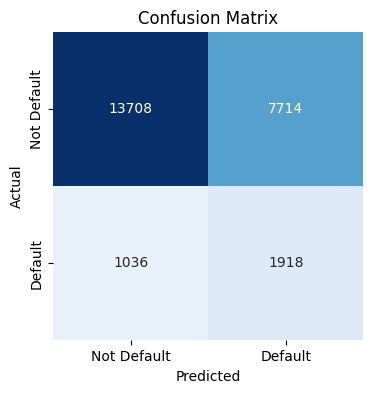

In [25]:
clr = classification_report(y_test, y_pred, target_names=["Not Default", "Default"])
cm = confusion_matrix(y_test, y_pred)
print("Classification Report:\n----------------------\n", clr)
auc_score = roc_auc_score(y_test, y_proba)
print(auc_score)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(2) + 0.5, ["Not Default", "Default"])
plt.yticks(np.arange(2) + 0.5, ["Not Default", "Default"])
plt.title("Confusion Matrix")
plt.show()

In [36]:
df1.head()

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
Customer_No,,,,,,,,,,,,,,,,,,
1,3,38,100.0,5,0.0,0.0,1,0.285714,0.428571,19.0,0.750,46,0.0,0.0,0,5527.0,15,0
2,1,68,100.0,1,0.0,0.0,1,0.000000,0.200000,2.0,0.500,33,0.0,0.0,0,12104.0,2,0
3,1,39,50.0,-3,0.0,0.0,1,0.200000,0.200000,25.0,1.000,28,0.0,0.0,1,153179.0,8,0
4,0,76,0.0,0,0.0,0.0,0,0.000000,0.000000,0.0,0.000,26,0.0,0.0,2,181589.0,6,0
5,3,23,33.0,11,0.0,0.0,1,0.250000,0.250000,19.0,0.375,28,0.0,0.0,1,10661.0,8,0


In [44]:
def split_and_scale(df):
    df = df.copy()
    
    # Split df into X and y
    y = df['Target_Flag'].copy()
    X = df.drop('Target_Flag', axis=1).copy()
    
    # Train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [39]:
def evaluate_model(model, class_balance, X_test, y_test):
    
    model_acc = model.score(X_test, y_test)
    print("Accuracy ({}): {:.2f}%".format(class_balance, model_acc * 100))
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

In [ ]:
models = {'logistic': LogisticRegression(), 
          'knn': knn}